___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (12,8)
import warnings
warnings.filterwarnings('ignore')
import os

### Exploratory Data Analysis

In [2]:
df = pd.read_csv("creditcard1.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
classes_count = pd.value_counts(df['Class'], sort=False)

Text(0, 0.5, 'Number of Transactions')

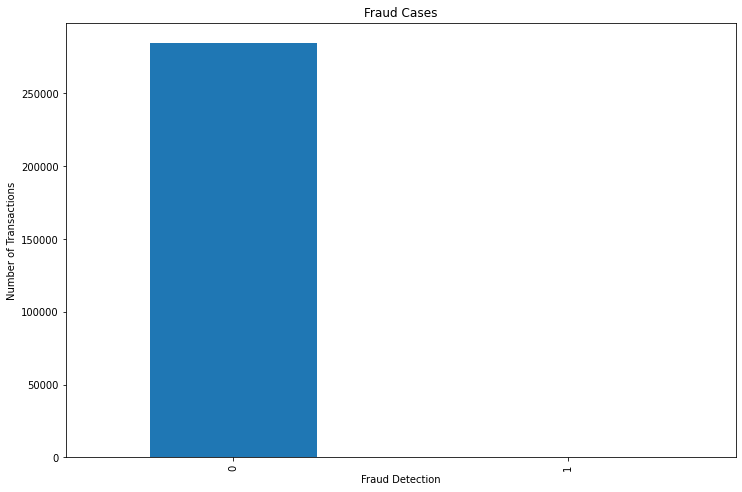

In [8]:
classes_count.plot (kind='bar')
plt.title ("Fraud Cases")
plt.xlabel ("Fraud Detection")
plt.ylabel ("Number of Transactions")

<AxesSubplot:ylabel='Class'>

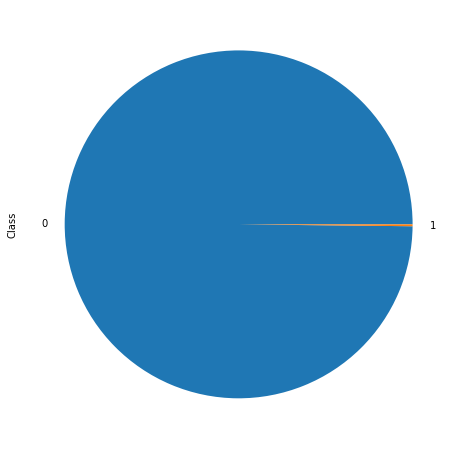

In [9]:
classes_count.plot (kind='pie')

(0.0, 172792.0)

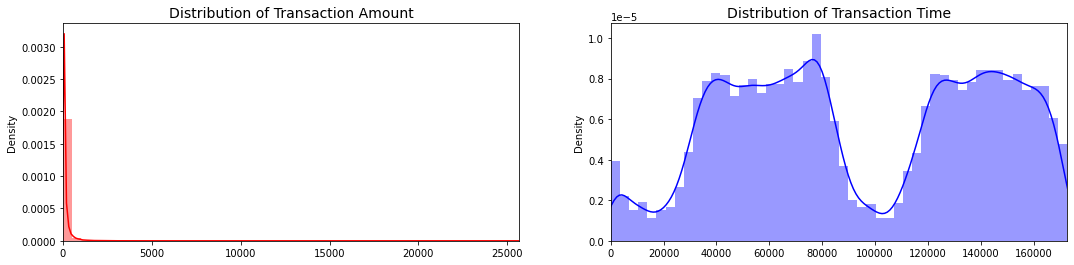

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

### Data Cleaning
Check Missing Values and Outliers

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
df.duplicated().sum()

1081

In [13]:
df[df.duplicated()]["Class"].value_counts()

0    1062
1      19
Name: Class, dtype: int64

In [14]:
#df1.drop_duplicates(inplace=True)

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [15]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Shape of train_X: ", X_train.shape)
print("Shape of test_X: ", X_test.shape)

Shape of train_X:  (199364, 30)
Shape of test_X:  (85443, 30)


#### Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [18]:
print("Shape of X_train_scaled: ", X_train_scaled.shape)
print("Shape of X_test_scaled: ", X_test_scaled.shape)

Shape of X_train_scaled:  (199364, 30)
Shape of X_test_scaled:  (85443, 30)


---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [22]:
from sklearn.model_selection import StratifiedKFold

In [23]:
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.ensemble import RandomForestClassifier

***ii. Model Training***

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

***iii. Prediction and Model Evaluating***

In [28]:
y_pred = log_model.predict(X_test_scaled)

In [29]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [30]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,pred,pred_proba
241490,151045.0,1.955871,-0.356320,-0.755022,0.200378,-0.005326,0.147083,-0.353449,-0.048314,1.075238,...,0.255011,0.031350,-0.274144,-0.622345,0.030457,-0.019496,54.99,0,0,0.000087
274604,166109.0,1.897458,-1.069351,-0.329917,-0.132043,-1.274159,-0.664482,-0.691789,-0.163773,0.134055,...,0.359541,-0.022055,-0.559639,-0.635831,0.045382,-0.006848,109.63,0,0,0.000058
112471,72660.0,1.069153,-0.099659,0.209815,1.247801,-0.120763,0.305745,-0.107489,0.240902,0.310033,...,-0.128356,-0.332623,0.604484,-0.308244,0.017072,0.005554,47.00,0,0,0.000444
256575,157761.0,1.406945,-2.229644,-1.092789,-0.521431,-1.250802,-0.145205,-0.441124,-0.081256,0.211283,...,0.115268,0.567331,-0.627162,-0.635385,-0.071644,0.029079,403.48,0,0,0.000050
38870,39590.0,0.986508,0.184641,0.849101,2.842953,-0.568682,-0.436752,0.122560,-0.051059,-0.286777,...,-0.000561,0.682535,0.399110,-0.117833,-0.016471,0.038132,84.15,0,0,0.001306
166998,118428.0,0.031949,0.691018,-0.160290,-0.946409,1.005506,-0.115156,0.841466,0.059584,-0.168300,...,-0.042739,-1.176756,-0.398553,0.194688,0.238728,0.075982,9.93,0,0,0.000043
183938,126027.0,1.768748,0.185913,-0.763596,3.779311,0.444492,0.482916,0.109521,0.052023,-0.857004,...,-0.048600,-0.495064,0.138338,0.100209,-0.044312,-0.053854,75.00,0,0,0.001677
131634,79674.0,1.238093,0.358710,0.207696,0.491642,-0.076714,-0.540244,0.034315,-0.084292,-0.334494,...,0.066466,-0.013474,0.259004,0.094492,-0.021621,0.019071,1.29,0,0,0.000127
230521,146366.0,1.960858,0.160150,-2.579314,0.412084,0.964449,-0.960408,0.722453,-0.347387,-0.252664,...,-0.072386,0.695186,0.346952,0.656079,-0.109781,-0.049404,56.50,0,0,0.000803
238572,149726.0,2.290995,-1.330458,-1.444165,-1.762170,-0.891923,-0.608115,-0.973674,-0.113423,-1.673277,...,0.116343,0.687706,0.021739,0.024152,-0.026819,-0.066753,15.00,0,0,0.000057


In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [32]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85295    12]
 [   50    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[198980     28]
 [   135    221]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.89      0.62      0.73       356

    accuracy                           1.00    199364
   macro avg       0.94      0.81      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [33]:
accuracy_score(y_test, y_pred)

0.9992743700478681


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


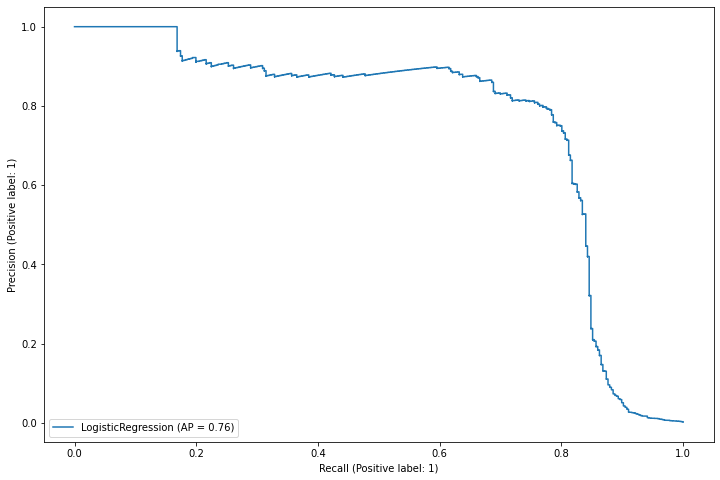

In [34]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

***v. Apply StratifiedKFold***

In [35]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
skf.get_n_splits(X, y)

10

In [36]:
for train_index, test_index in skf.split(X, y):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

In [37]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
y_pred_proba = log_model.predict_proba(X_test)
y_pred_proba

array([[9.95284814e-01, 4.71518637e-03],
       [9.72184313e-01, 2.78156873e-02],
       [8.85719515e-01, 1.14280485e-01],
       ...,
       [9.99999959e-01, 4.11916350e-08],
       [1.00000000e+00, 1.55745104e-17],
       [9.99999986e-01, 1.36749733e-08]])

In [40]:
precision_score(y_test, y_pred)

0.75

In [41]:
recall_score(y_test, y_pred)

0.7346938775510204

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [43]:
smote = SMOTE(random_state = 101)
X_train_sm, y_train_sm = smote.fit_resample(df.drop("Class", axis=1), df['Class'])

In [44]:
X_train_sm.shape

(568630, 30)

In [45]:
y_train_sm.shape

(568630,)

***ii. Model Training***

In [46]:
log_model_sm = LogisticRegression()

In [47]:
log_model_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

***iii. Prediction and Model Evaluating***

In [48]:
log_model.predict(X_test_scaled)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
log_model.predict_proba(X_test_scaled)

array([[1.00808251e-13, 1.00000000e+00],
       [7.30252668e-01, 2.69747332e-01],
       [9.08843430e-01, 9.11565699e-02],
       ...,
       [8.20920573e-01, 1.79079427e-01],
       [5.40656843e-01, 4.59343157e-01],
       [9.36073884e-01, 6.39261157e-02]])

In [50]:
eval_metric(log_model, X_train_sm, y_train_sm, X_test, y_test)

Test_Set
[[28419    12]
 [   13    36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.75      0.73      0.74        49

    accuracy                           1.00     28480
   macro avg       0.87      0.87      0.87     28480
weighted avg       1.00      1.00      1.00     28480


Train_Set
[[284178    137]
 [ 91068 193247]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86    284315
           1       1.00      0.68      0.81    284315

    accuracy                           0.84    568630
   macro avg       0.88      0.84      0.84    568630
weighted avg       0.88      0.84      0.84    568630



In [51]:
# 

***iv.  Plot Precision and Recall Curve***


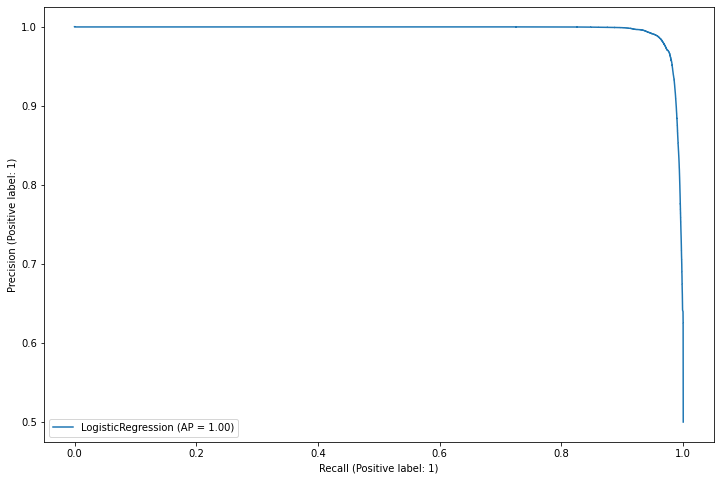

In [52]:
plot_precision_recall_curve(log_model_sm, X_train_sm, y_train_sm);

In [53]:
y_pred_proba = log_model_sm.predict_proba(X_train_sm)
average_precision_score(y_train_sm, y_pred_proba[:,1])

0.9958363546999218

***v. Apply StratifiedKFold***

In [54]:
def CV(n, model, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    pre_scores = []
    rec_scores = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        model = model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
             
        
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
    
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')

In [55]:
model = log_model

In [56]:
CV(10, model, pd.DataFrame(X_train), y_train)

Precision-1   72.73%  std 7.35%
Recall-1      65.96%  std 8.34%


In [57]:
eval_metric(log_model, X_train_sm, y_train_sm, X_test, y_test)

Test_Set
[[28419    12]
 [   13    36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.75      0.73      0.74        49

    accuracy                           1.00     28480
   macro avg       0.87      0.87      0.87     28480
weighted avg       1.00      1.00      1.00     28480


Train_Set
[[284190    125]
 [ 77797 206518]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88    284315
           1       1.00      0.73      0.84    284315

    accuracy                           0.86    568630
   macro avg       0.89      0.86      0.86    568630
weighted avg       0.89      0.86      0.86    568630



### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [58]:
rf_model = RandomForestClassifier(random_state=101)

In [59]:
rf_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=101)

***ii. Prediction and Model Evaluating***

In [201]:
model = rf_model

In [202]:
CV(10, model, pd.DataFrame(X_train), y_train)

Precision-1   94.62%  std 2.37%
Recall-1      77.87%  std 5.37%


In [203]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[28427     4]
 [    9    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.91      0.82      0.86        49

    accuracy                           1.00     28480
   macro avg       0.95      0.91      0.93     28480
weighted avg       1.00      1.00      1.00     28480


Train_Set
[[255880      4]
 [     7    436]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255884
           1       0.99      0.98      0.99       443

    accuracy                           1.00    256327
   macro avg       1.00      0.99      0.99    256327
weighted avg       1.00      1.00      1.00    256327



In [ ]:
# OVERFIT

***iii. Plot Precision and Recall Curve***


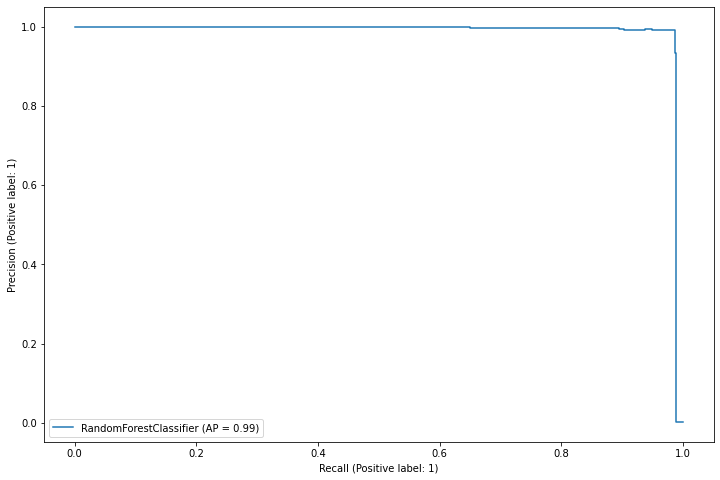

In [204]:
plot_precision_recall_curve(rf_model, X_train, y_train);

***iv. Apply StratifiedKFold***

In [205]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
skf.get_n_splits(X, y)

10

In [206]:
model = rf_model

In [207]:
CV(10, model, pd.DataFrame(X_train), y_train)

Precision-1   94.62%  std 2.37%
Recall-1      77.87%  std 5.37%


In [208]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[28427     4]
 [    9    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.91      0.82      0.86        49

    accuracy                           1.00     28480
   macro avg       0.95      0.91      0.93     28480
weighted avg       1.00      1.00      1.00     28480


Train_Set
[[255880      4]
 [     7    436]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255884
           1       0.99      0.98      0.99       443

    accuracy                           1.00    256327
   macro avg       1.00      0.99      0.99    256327
weighted avg       1.00      1.00      1.00    256327



### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

***ii. Define Model***

In [221]:
model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train_scaled.shape[1]))
model.add(Dense(20, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

***iii. Compile Model***

In [222]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [212]:
# Use binary_crossentropy because our target ("Class") has only 0 or 1 values

***iv. Fit Model***

In [223]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose=1)

Epoch 1/100
5608/5608 [==============================] - 7s 1ms/step - loss: 0.0197 - accuracy: 0.9973 - val_loss: 0.0101 - val_accuracy: 0.9988
Epoch 2/100
5608/5608 [==============================] - 6s 1ms/step - loss: 0.0144 - accuracy: 0.9981 - val_loss: 0.0110 - val_accuracy: 0.9988
Epoch 3/100
5608/5608 [==============================] - 6s 1ms/step - loss: 0.0142 - accuracy: 0.9981 - val_loss: 0.0097 - val_accuracy: 0.9988
Epoch 4/100
5608/5608 [==============================] - 6s 1ms/step - loss: 0.0141 - accuracy: 0.9981 - val_loss: 0.0095 - val_accuracy: 0.9988
Epoch 5/100
5608/5608 [==============================] - 6s 1ms/step - loss: 0.0139 - accuracy: 0.9981 - val_loss: 0.0096 - val_accuracy: 0.9988
Epoch 6/100
5608/5608 [==============================] - 6s 1ms/step - loss: 0.0138 - accuracy: 0.9981 - val_loss: 0.0097 - val_accuracy: 0.9988
Epoch 7/100
5608/5608 [==============================] - 6s 1ms/step - loss: 0.0137 - accuracy: 0.9981 - val_loss: 0.0098 - val_ac

5608/5608 [==============================] - 6s 995us/step - loss: 0.0100 - accuracy: 0.9982 - val_loss: 0.0148 - val_accuracy: 0.9987
Epoch 58/100
5608/5608 [==============================] - 6s 1ms/step - loss: 0.0100 - accuracy: 0.9982 - val_loss: 0.0157 - val_accuracy: 0.9987
Epoch 59/100
5608/5608 [==============================] - 6s 1ms/step - loss: 0.0099 - accuracy: 0.9982 - val_loss: 0.0161 - val_accuracy: 0.9988
Epoch 60/100
5608/5608 [==============================] - 6s 997us/step - loss: 0.0097 - accuracy: 0.9982 - val_loss: 0.0158 - val_accuracy: 0.9986
Epoch 61/100
5608/5608 [==============================] - 6s 999us/step - loss: 0.0097 - accuracy: 0.9982 - val_loss: 0.0152 - val_accuracy: 0.9985
Epoch 62/100
5608/5608 [==============================] - 6s 997us/step - loss: 0.0097 - accuracy: 0.9982 - val_loss: 0.0170 - val_accuracy: 0.9986
Epoch 63/100
5608/5608 [==============================] - 6s 997us/step - loss: 0.0097 - accuracy: 0.9982 - val_loss: 0.0166 - va

In [224]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                930       
                                                                 
 dense_6 (Dense)             (None, 20)                620       
                                                                 
 dense_7 (Dense)             (None, 15)                315       
                                                                 
 dense_8 (Dense)             (None, 10)                160       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,036
Trainable params: 2,036
Non-trainable params: 0
_________________________________________________________________


***v. Prediction and Model Evaluating***

In [225]:
y_pred = model.predict(X_test).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

890/890 [==============================] - 1s 664us/step
[[28431     0]
 [   49     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        49

    accuracy                           1.00     28480
   macro avg       0.50      0.50      0.50     28480
weighted avg       1.00      1.00      1.00     28480



***vi. Plot Precision and Recall Curve***

In [219]:
plot_precision_recall_curve(model, X_train, y_train);

ValueError: Expected 'estimator' to be a binary classifier, but got Sequential

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Model as .pkl


### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___